# Hypothesis 4
### Visits to low-end businesses and high-end businesses will inversely fluctuate respective to the economy.
##### e.g. If an individual wants hamburgers for dinner, but doesn’t have the money to spend, they’re more likely to go to McDonald’s than to Red Robin.

We're going to plot the numbers of reviews per date from a specific location in the Yelp dataset that review lower-end businesses and compare that to the number from higher-end businesses, and from this we will again try to visualize economic change. Again, the frequencies will need to be normalized to account for the ever-growing numbers of Yelpers over time.

In [1]:
low_end_regexes = r"(jimmy john|subway|mcdonald|wendy|burger king)"

high_end_regexes = r"(red lobster|texas roadhouse|outback|red robin)"

In [2]:
import pandas as pd
import numpy as np
import collections
import pickle, os
from matplotlib.dates import date2num
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# change this path to your own.
path = "E:/yelp/"

We're going to steal swaths of code from 'Hypothesis 1' and put it here to be used.

In [4]:
def plot_city_stats(times, other_axis, redo_x=False, redo_y=False):
    """
    This allows you to plot our dates and normalized counts with a particular x and y axis.
    
    Args:
        times ([datetime.datetime]): the datetimes where reviews are present for a given location
        other_axis ([float]): the review_counts for the datetimes normalized by number of new users on that date
        redo_x ([datetime], optional): two datetimes representing the start and end dates to view on the graph; defaults to False.
        redo_y ([float], optional): two floats representing the upper and lower bounds of the normalized reviews to be viewed on the graph; defaults to False.
    
    """
    
    plottable_dates = date2num([datetime.strptime(i, '%Y-%m-%d') for i in times])
    
    plt.figure(figsize=(20,10))
    plt.plot_date(plottable_dates, other_axis)
    
    if redo_x:
        plt.xlim(redo_x[0], redo_x[1])
    
    if redo_y:
        plt.ylim(redo_y[0], redo_y[1])
    
    #plt.title("{} for {}".format(stats, city))
    #plt.plot(times, np.poly1d(np.polyfit(times, other_axis, 1)))
    plt.show()

A different normalizeLocation function will be necessary for this task, as we are not measuring the same things as we did in Hypothesis 1.

In [5]:
def extractBusinessesByRegex(regexes, path):
    """
    Extracts all businesses whose names contain a given regex.
    This will be used to compare low-end to high-end business review counts.
    
    Args:
        regexes (str): the regexes to search for representing business names
        path (str): the main path to the files
    
    Returns:
        [str]: represents the business IDs of businesses that adhere to the regex
    
    """
    
    businesses = pd.read_csv(os.path.join(path, "business.csv"), header=0, sep="\t")
    
    relevant_businesses = businesses[businesses['name'].str.contains(regexes, case=False)]['business_id']
    
    del businesses
    
    return relevant_businesses.tolist()

In [6]:
def normalizeLocation(state, path, regexes, cities_or_states="States"):
    """
    Given a state (or city if you really want to go that route), find the dates of the reviews and the normalized counts per date.
    
    Args:
        state (str): represents the state code or city_state combo
        path (str): the location where all the files for this project can be found
        regexes (str): the regexes to search for representing business names
        cities_or_states (str, optional): either "States" or "Cities" and reflects which directory data is being found in
        
    Returns:
        [datetime.datetime]: the dates where reviews for a given location are taken from
        [float]: review counts normalized given new user counts for each date in the datetime
    
    """
    
    reviews = pd.read_pickle(os.path.join(path, cities_or_states, "{}.pkl".format(state)))

    review_dates = reviews.sort_values('date')['date'].unique().tolist()  # first part to return
    overall_sorted_reviews = reviews.sort_values('date').groupby(['date'], as_index=False).count()
    overall_review_counts = overall_sorted_reviews['review_id'].tolist()
    
    relevant_businesses = extractBusinessesByRegex(regexes, path)
    
    relevant_reviews = reviews.filter(['date']).join(reviews['business_id'].isin(relevant_businesses))
    sorted_relevant_reviews = relevant_reviews.groupby(['date'], as_index=False).sum()
    
    review_counts = sorted_relevant_reviews['business_id'].tolist()

    normalized_review_counts = [r / u for r,u in zip(review_counts, overall_review_counts)]  # second part to return
    
    return review_dates, normalized_review_counts

In [7]:
low_ON_dates, low_ON_counts = normalizeLocation("ON", path, low_end_regexes)
high_ON_dates, high_ON_counts = normalizeLocation("ON", path, high_end_regexes)

C:\Users\jayka\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


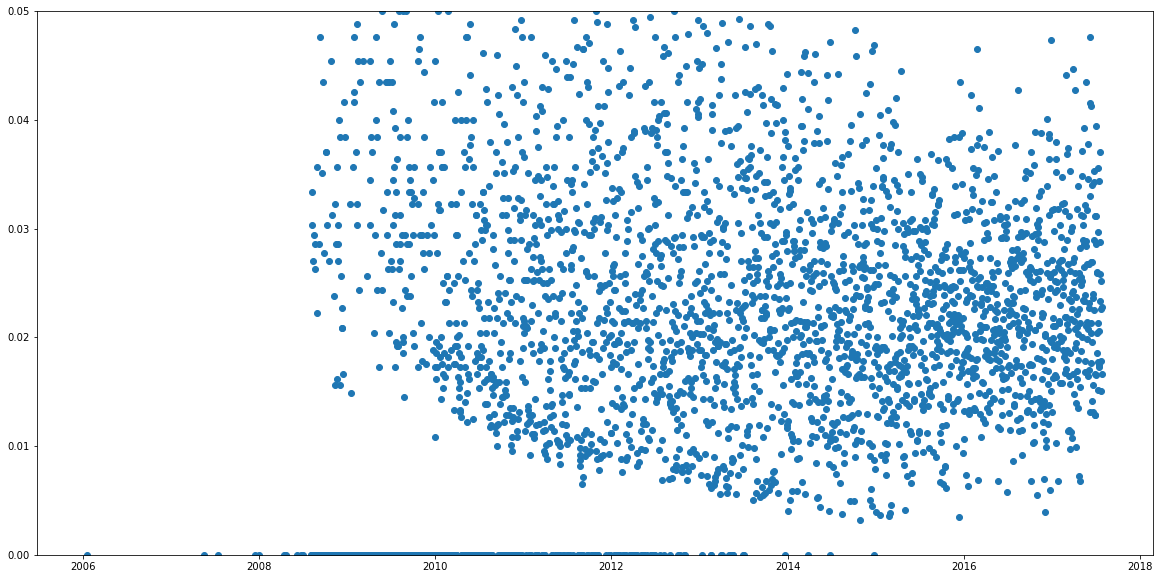

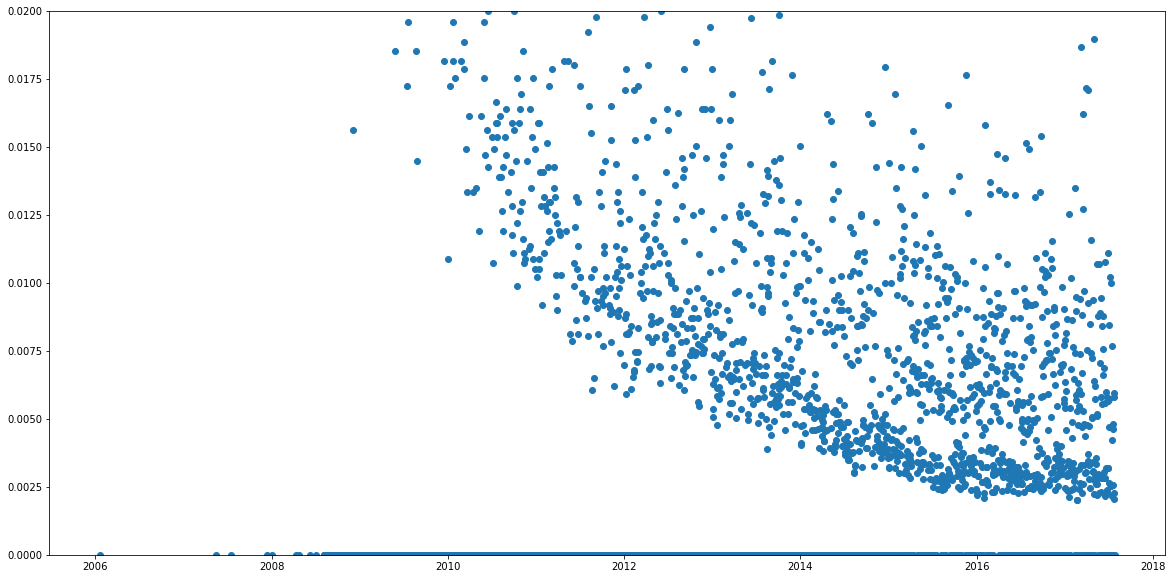

In [8]:
plot_city_stats(low_ON_dates, low_ON_counts,
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0.0, 0.05],
               )

plot_city_stats(high_ON_dates, high_ON_counts,
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0.0, 0.02],
               )

In [9]:
low_NV_dates, low_NV_counts = normalizeLocation("NV", path, low_end_regexes)
high_NV_dates, high_NV_counts = normalizeLocation("NV", path, high_end_regexes)

C:\Users\jayka\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


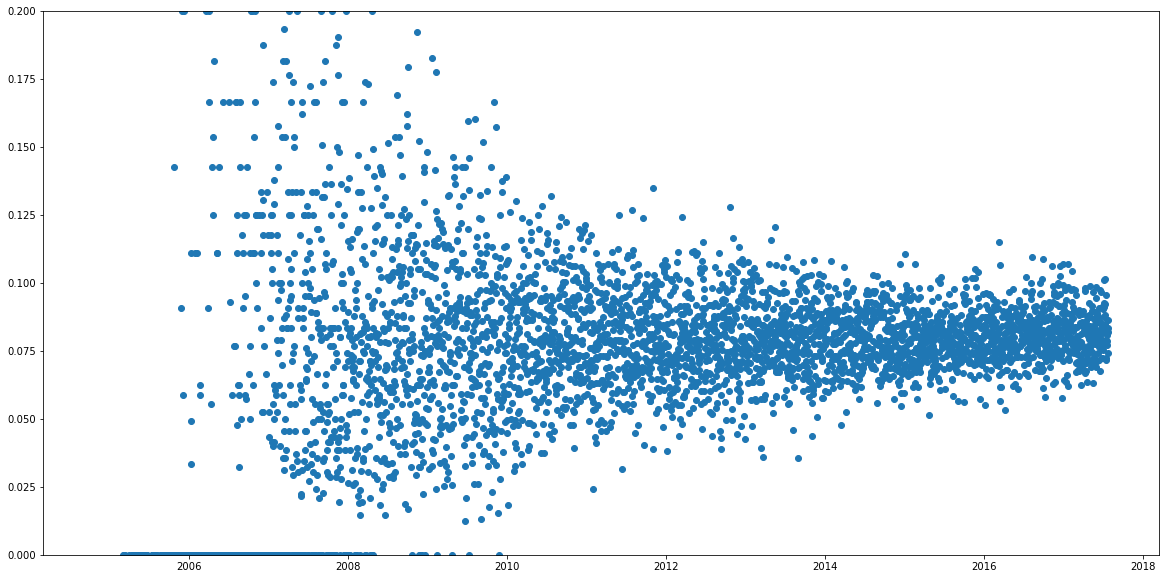

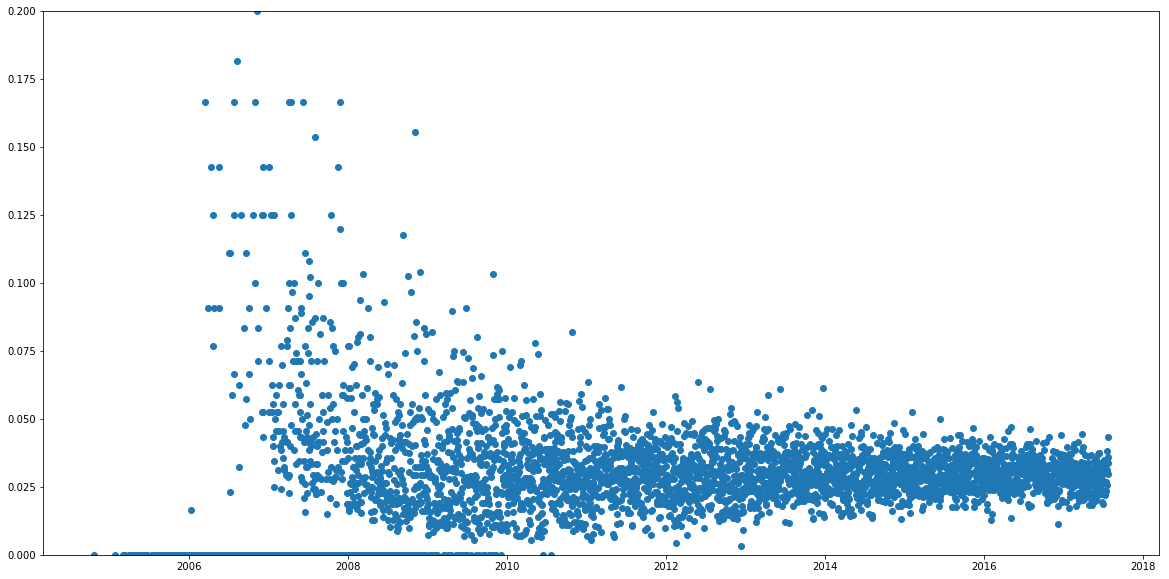

In [10]:
plot_city_stats(low_NV_dates, low_NV_counts,
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0.0, 0.2],
               )

plot_city_stats(high_NV_dates, high_NV_counts,
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0.0, 0.2],
               )

In [11]:
low_EDH_dates, low_EDH_counts = normalizeLocation("EDH", path, low_end_regexes)
high_EDH_dates, high_EDH_counts = normalizeLocation("EDH", path, high_end_regexes)

C:\Users\jayka\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


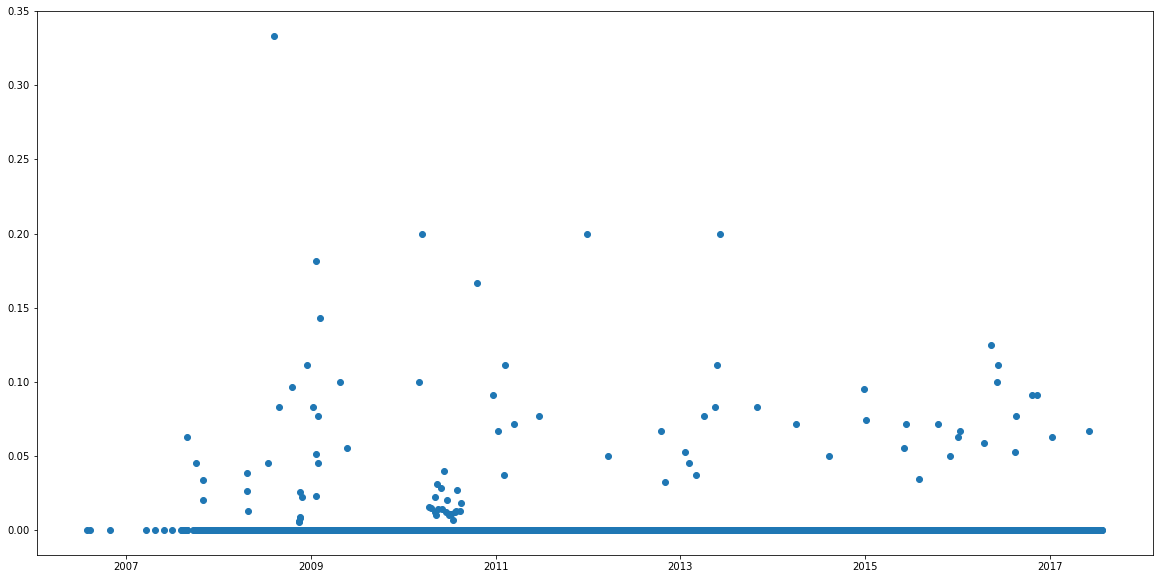

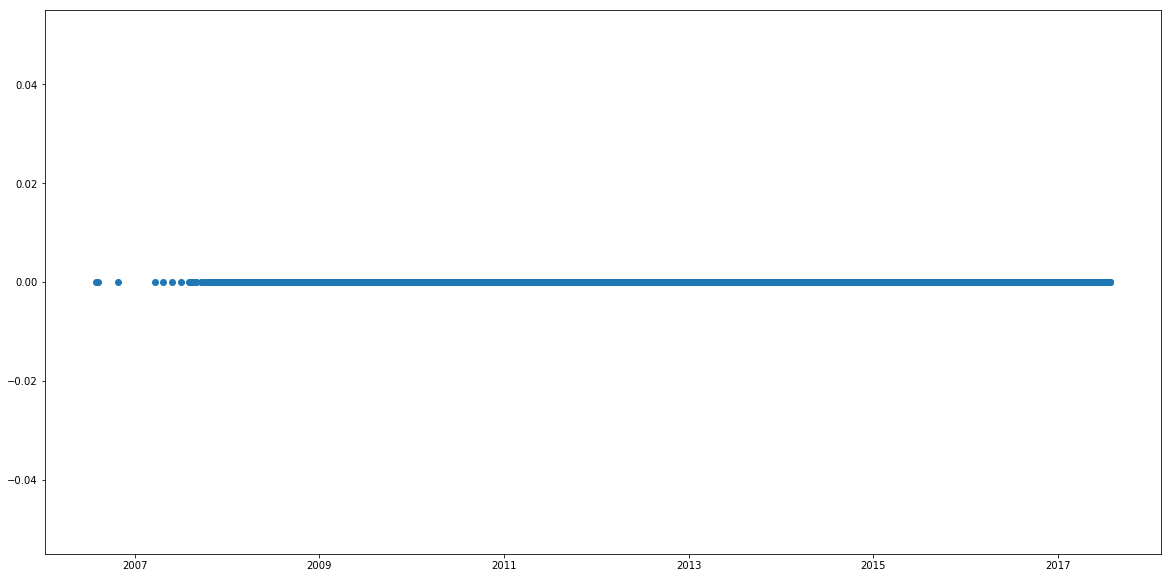

In [12]:
plot_city_stats(low_EDH_dates, low_EDH_counts,
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                #redo_y=[0.0, 0.02],
               )

plot_city_stats(high_EDH_dates, high_EDH_counts,
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                #redo_y=[0.0, 0.02],
               )